In [16]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

In [23]:
# Import the data
file_path = '../Resources/lending_data.csv'
df = pd.read_csv('Resources/lending_data.csv')
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [24]:
df["loan_status"].value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

In [25]:
df.dtypes

loan_size           float64
interest_rate       float64
borrower_income       int64
debt_to_income      float64
num_of_accounts       int64
derogatory_marks      int64
total_debt            int64
loan_status           int64
dtype: object

In [26]:
df.columns

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')

In [27]:
df.isnull().value_counts()

loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  derogatory_marks  total_debt  loan_status
False      False          False            False           False            False             False       False          77536
dtype: int64

In [28]:
# Define the X (features) and y (target) sets
y = df["loan_status"].values
X = df.drop("loan_status", axis=1)
target_names = ["low risk", "high risk"]

In [29]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
63243,8900.0,6.893,45500,0.340659,3,0,15500
36991,9000.0,6.932,45800,0.344978,3,0,15800
39985,8900.0,6.896,45500,0.340659,3,0,15500
63047,9000.0,6.961,46100,0.349241,3,0,16100
49913,8400.0,6.712,43800,0.315068,3,0,13800


In [30]:
X_test.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
67504,8100.0,6.575,42500,0.294118,2,0,12500
55887,9000.0,6.930,45800,0.344978,3,0,15800
14010,9900.0,7.345,49700,0.396378,4,0,19700
43768,9100.0,6.976,46200,0.350649,3,0,16200
24257,10100.0,7.427,50500,0.405941,4,1,20500


In [31]:
# Train a Logistic Regression model print the model score
# Create the logistic model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression()

In [32]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'tol': [0.00001, 0.0001, 0.001]
}
param_grid

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'tol': [1e-05, 0.0001, 0.001]}

In [33]:
from sklearn.model_selection import GridSearchCV
grid_clf = GridSearchCV(model, param_grid, verbose=3)

In [34]:
# Fit the model by using the grid search classifier. 
# This will take the LogisticRegression model and try each combination of parameters.
grid_clf.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ................C=0.001, tol=1e-05;, score=0.994 total time=   0.1s
[CV 2/5] END ................C=0.001, tol=1e-05;, score=0.991 total time=   0.1s
[CV 3/5] END ................C=0.001, tol=1e-05;, score=0.990 total time=   0.0s
[CV 4/5] END ................C=0.001, tol=1e-05;, score=0.992 total time=   0.0s
[CV 5/5] END ................C=0.001, tol=1e-05;, score=0.992 total time=   0.0s
[CV 1/5] END ...............C=0.001, tol=0.0001;, score=0.994 total time=   0.0s
[CV 2/5] END ...............C=0.001, tol=0.0001;, score=0.991 total time=   0.0s
[CV 3/5] END ...............C=0.001, tol=0.0001;, score=0.990 total time=   0.0s
[CV 4/5] END ...............C=0.001, tol=0.0001;, score=0.992 total time=   0.0s
[CV 5/5] END ...............C=0.001, tol=0.0001;, score=0.992 total time=   0.0s
[CV 1/5] END ................C=0.001, tol=0.001;, score=0.994 total time=   0.0s
[CV 2/5] END ................C=0.001, tol=0.001;

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'tol': [1e-05, 0.0001, 0.001]},
             verbose=3)

In [35]:
# List the best parameters for this dataset
print(grid_clf.best_params_)

{'C': 0.001, 'tol': 1e-05}


In [36]:
# List the best score
print(grid_clf.best_score_)

0.99186611845342


In [37]:
# Make predictions with the hypertuned model
predictions = grid_clf.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
# Score the hypertuned model on the test dataset
grid_clf.score(X_test, y_test)

0.9924680148576145

In [39]:
# Calculate the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    low risk       1.00      1.00      1.00     18792
   high risk       0.85      0.91      0.88       592

    accuracy                           0.99     19384
   macro avg       0.93      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [41]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [42]:
# Train a Logistic Regression model print the model score
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9919177328380795
Testing Data Score: 0.9924680148576145


In [43]:
print(f'Actual:\t\t{list(y_test[:10])}')
print(f'Predicted:\t{list(classifier.predict(X_test[:10]))}')

Actual:		[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Predicted:	[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


In [44]:
print(f'Actual:\t\t{list(y_test[:1])}')
print(f'Predicted:\t{list(classifier.predict(X_test[:1]))}')

Actual:		[0]
Predicted:	[0]


In [45]:
predictions = classifier.predict(X_test)
prediction=pd.DataFrame({"Prediction": predictions, "Actual": y_test})
prediction.value_counts()

Prediction  Actual
0           0         18699
1           1           539
            0            93
0           1            53
dtype: int64

In [46]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[18699,    93],
       [   53,   539]], dtype=int64)

In [47]:
confusion_matrix(y, classifier.predict(X))

array([[74657,   379],
       [  237,  2263]], dtype=int64)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18792
           1       0.85      0.91      0.88       592

    accuracy                           0.99     19384
   macro avg       0.93      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9941188609162196
Testing Score: 0.9941704498555509


In [51]:
## Train a Random Forest Classifier model and print the model score

In [52]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf2.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf2.score(X_test_scaled, y_test)}')

Training Score: 0.9971970009629936
Testing Score: 0.991900536524969


In [53]:
feature_importances = clf2.feature_importances_

[1.20268418e-01 3.01393087e-01 1.76271265e-01 1.51317720e-01
 1.11568592e-01 1.18380419e-04 1.39062538e-01]


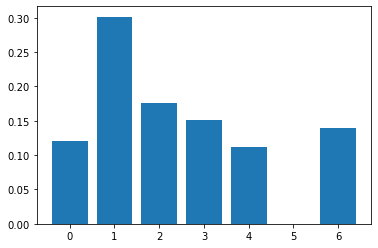

In [54]:
import matplotlib.pyplot as plt
features = clf2.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()